# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [1]:
import sqlite3 as sl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("data/moviestreams.csv")
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [4]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [5]:
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime','Rotten Tomatoes','Age'],inplace=True)
# drop null and reset index using .reset_index().

In [6]:
df.reset_index(inplace=True,drop=True)

In [7]:
df.isnull().sum()

Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'IMDb'}>],
       [<AxesSubplot:title={'center':'Netflix'}>,
        <AxesSubplot:title={'center':'Hulu'}>,
        <AxesSubplot:title={'center':'Prime Video'}>],
       [<AxesSubplot:title={'center':'Disney+'}>,
        <AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Runtime'}>]], dtype=object)

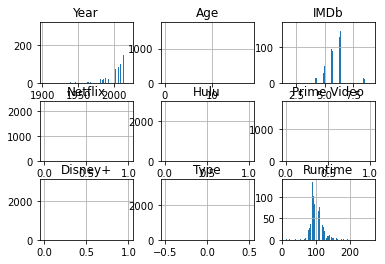

In [17]:
# # Plot a histogram to see if there are any outliers.
df.hist(bins=400)

<AxesSubplot:>

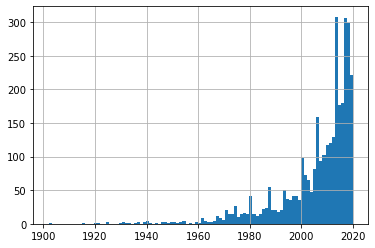

In [23]:
df["Year"].hist(bins=100) 

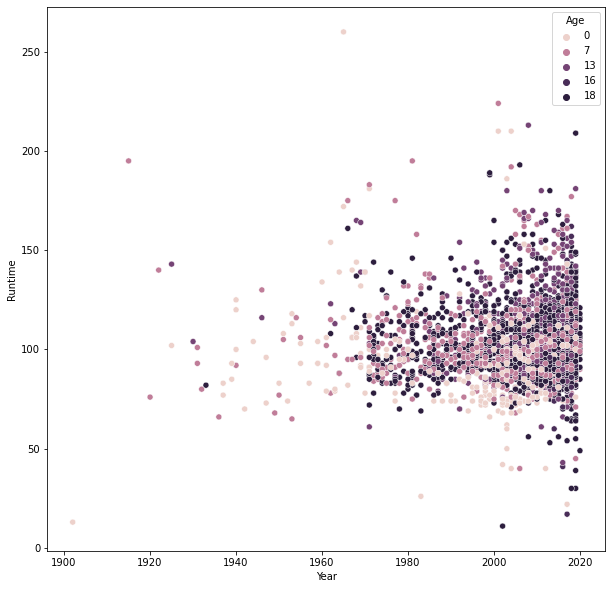

In [24]:
sns.scatterplot(x="Year", y="Runtime", hue="Age",data=df)
fig=plt.gcf()
fig.set_size_inches(10,10)
#we can see the outlier and the hue is Age.

In [31]:
df.drop(df[df['Year'] < 1960].index, inplace= True)

<AxesSubplot:>

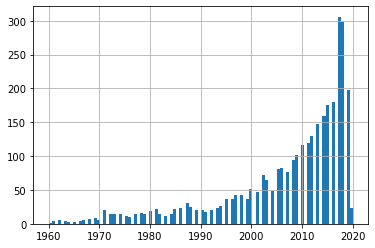

In [32]:
df["Year"].hist(bins=100) #here i dropped the the outlier.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [8]:
df.drop(['Unnamed: 0',
 'ID'],axis =1,inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.9+ MB


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [9]:
df["Age"].value_counts() # no  need for the + in Age group.so will replace with number.

18+    1681
13+     666
7+      603
all     257
16+      94
Name: Age, dtype: int64

In [10]:
df["Age"].replace({'13+': 13 ,'18+':18,'7+':7,'all':0,'16+':16},inplace=True)

In [11]:
df["Age"].value_counts()

18    1681
13     666
7      603
0      257
16      94
Name: Age, dtype: int64

In [12]:
# Here Rotten Tomatoes is object value so I have to convert it to float. I will remove % symbol first after that i will use to numeric funtion. 
df["Rotten Tomatoes"]=df["Rotten Tomatoes"].str.replace('%','')

In [13]:
df["Rotten Tomatoes"]

0       87
1       87
2       84
3       96
4       97
        ..
3296     5
3297    17
3298    13
3299     6
3300     7
Name: Rotten Tomatoes, Length: 3301, dtype: object

In [14]:
pd.to_numeric(df['Rotten Tomatoes'])

0       87
1       87
2       84
3       96
4       97
        ..
3296     5
3297    17
3298    13
3299     6
3300     7
Name: Rotten Tomatoes, Length: 3301, dtype: int64

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [ ]:
#1_  in the Missing Data part I droped  null and reset index using .reset_index().
# in the Irregular Data part we can see the outlier and the hueis Age.
# we can see that more films are made as time proceeds, this can be VISUALIZED using distribution graph
#in the Unnecessary Data part I  droped some unwanted columns
# in Inconsistent Data I found the is plus coming with the age, i replace it with new age group.
# and also the Rotten Tomatoes is object value so I  converted it to float.
# I  removed % symbol first after that i used to numeric funtion.

In [ ]:
#2_ when i cleaned the data i found we can see that more films are made as time proceeds.

In [38]:
# export my data 
df.to_csv("data/moviestreams exported.csv", sep=",")